<a href="https://colab.research.google.com/github/diegoantunescosta/MachineLearning/blob/main/TensorFlow_Hub_Classifica%C3%A7%C3%A3o_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Hub - Classificação de Imagens

- Baseado em: https://www.tensorflow.org/hub/tutorials/tf2_image_retraining?hl=pt-br

# Importação das bibliotecas

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
print('Versão do TensorFlow: ', tf.__version__)
print('Versão do TensorFlow Hub: ', hub.__version__)
from zipfile import ZipFile 


Versão do TensorFlow:  2.9.2
Versão do TensorFlow Hub:  0.12.0


# Configurações do modelo

In [10]:
# Lista com os modelos disponíveis: https://tfhub.dev/s?module-type=image-feature-vector&tf-version=tf2
nome_modelo = 'efficientnetv2-xl-21k' # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

In [11]:
links_modelos = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

In [12]:
pixels_modelo = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

In [13]:
caminho_modelo = links_modelos.get(nome_modelo)
caminho_modelo

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [14]:
pixels = pixels_modelo.get(nome_modelo)
pixels

512

In [15]:
tamanho_imagem = (pixels, pixels)
tamanho_imagem

(512, 512)

In [16]:
print('Modelo utilizado: ', nome_modelo)
print('Caminho do modelo:', caminho_modelo)
print('Tamanho das imagens: ', tamanho_imagem)

Modelo utilizado:  efficientnetv2-xl-21k
Caminho do modelo: https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2
Tamanho das imagens:  (512, 512)


# Base de dados

- Kaggle: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
- TensorFlow: https://www.tensorflow.org/datasets/catalog/tf_flowers

In [17]:
file_name = "/content/BRAQUIARIA.zip"
with ZipFile(file_name, 'r') as zip: 
    
    zip.printdir() 
  
    
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')


File Name                                             Modified             Size
BRAQUIARIA/                                    2022-12-07 14:31:26            0
BRAQUIARIA/15-20/                              2023-01-09 10:04:58            0
BRAQUIARIA/15-20/Taruma-P1-20221130-160-BRAQUIARIA_106.png 2022-12-07 10:03:12        30118
BRAQUIARIA/15-20/Taruma-P1-20221130-160-BRAQUIARIA_108.png 2022-12-07 10:03:12        33502
BRAQUIARIA/15-20/Taruma-P1-20221130-160-BRAQUIARIA_063.png 2022-12-07 10:03:12        30573
BRAQUIARIA/15-20/Taruma-P1-20221130-160-BRAQUIARIA_107.png 2022-12-07 10:03:12        30481
BRAQUIARIA/15-20/Taruma-P1-20221130-160-BRAQUIARIA_110.png 2022-12-07 10:03:12        35824
BRAQUIARIA/15-20/Taruma-P1-20221130-160-BRAQUIARIA_112.png 2022-12-07 10:03:12        34291
BRAQUIARIA/15-20/Taruma-P1-20221130-160-BRAQUIARIA_109.png 2022-12-07 10:03:12        34336
BRAQUIARIA/15-20/Taruma-P1-20221130-160-BRAQUIARIA_114.png 2022-12-07 10:03:12        33102
BRAQUIARIA/15-20/Taruma-

In [18]:
diretorio_dados ='/content/BRAQUIARIA'
diretorio_dados

'/content/BRAQUIARIA'

## Base de treinamento

In [19]:
base_treinamento = tf.keras.preprocessing.image_dataset_from_directory(diretorio_dados,
                                                                       validation_split = .20,
                                                                       subset = 'training',
                                                                       label_mode = 'categorical',
                                                                       seed = 123,
                                                                       image_size = tamanho_imagem,
                                                                       batch_size = 1)

Found 2933 files belonging to 8 classes.
Using 2347 files for training.


In [20]:
2936 / 3670

0.8

In [21]:
base_treinamento.class_names

['15-20', '20-25', '25-30', '35-40', '40-45', '50-55', '55-60', '60-65']

In [22]:
classes = base_treinamento.class_names
classes

['15-20', '20-25', '25-30', '35-40', '40-45', '50-55', '55-60', '60-65']

In [23]:
tamanho_treinamento = base_treinamento.cardinality().numpy()
tamanho_treinamento

2347

In [24]:
BATCH_SIZE = 16

In [25]:
base_treinamento = base_treinamento.unbatch().batch(BATCH_SIZE)

In [26]:
base_treinamento

<BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [27]:
2936 / 16

183.5

In [28]:
# https://www.tensorflow.org/api_docs/python/tf/repeat
# https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset
base_treinamento = base_treinamento.repeat()

In [29]:
# Documentação augmentation: https://www.tensorflow.org/tutorials/images/data_augmentation
camada_normalizacao = tf.keras.layers.Rescaling(1. / 255)
pre_processamento = tf.keras.Sequential([camada_normalizacao])
pre_processamento.add(tf.keras.layers.RandomRotation(40))
pre_processamento.add(tf.keras.layers.RandomTranslation(0, 0.2))
pre_processamento.add(tf.keras.layers.RandomTranslation(0.2, 0))
pre_processamento.add(tf.keras.layers.RandomZoom(0.2, 0.2))
pre_processamento.add(tf.keras.layers.RandomFlip(mode = 'horizontal'))

In [30]:
base_treinamento = base_treinamento.map(lambda imagens, labels: (pre_processamento(imagens), labels))

In [31]:
base_treinamento

<MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

## Base de teste

In [32]:
base_teste = tf.keras.preprocessing.image_dataset_from_directory(diretorio_dados,
                                                                 validation_split = .20,
                                                                 subset = 'validation',
                                                                 label_mode = 'categorical',
                                                                 seed = 123,
                                                                 image_size = tamanho_imagem,
                                                                 batch_size = 1)

Found 2933 files belonging to 8 classes.
Using 586 files for validation.


In [33]:
tamanho_teste = base_teste.cardinality().numpy()
tamanho_teste

586

In [34]:
base_teste = base_teste.unbatch().batch(BATCH_SIZE)
base_teste = base_teste.map(lambda imagens, labels: (camada_normalizacao(imagens), labels))

# Construção e treinamento da rede neural

In [35]:
tamanho_imagem + (3,)

(512, 512, 3)

In [36]:
caminho_modelo

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [37]:
len(classes)

8

In [38]:
# Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
modelo = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape = tamanho_imagem + (3,)),
                              hub.KerasLayer(caminho_modelo, trainable=False),
                              tf.keras.layers.Dropout(rate = 0.2),
                              tf.keras.layers.Dense(len(classes))
])

In [39]:
(None,) + tamanho_imagem + (3,)

(None, 512, 512, 3)

In [40]:
modelo.build((None,) + tamanho_imagem + (3,))
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 207,626,080
Trainable params: 10,248
Non-trainable params: 207,615,832
_________________________________________________________________


In [41]:
modelo.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [42]:
steps_per_epoch = tamanho_treinamento // BATCH_SIZE
validation_steps = tamanho_teste // BATCH_SIZE
print(steps_per_epoch, validation_steps)

146 36


In [43]:
hist = modelo.fit(base_treinamento, epochs = 10, steps_per_epoch=steps_per_epoch,
                  validation_data = base_teste, validation_steps=validation_steps).history

Epoch 1/10
146/146 [==============================] - 278s 2s/step - loss: 1.0738 - accuracy: 0.5736 - val_loss: 0.6025 - val_accuracy: 0.7743
Epoch 2/10
146/146 [==============================] - 242s 2s/step - loss: 0.5498 - accuracy: 0.7864 - val_loss: 0.4021 - val_accuracy: 0.8576
Epoch 3/10
146/146 [==============================] - 242s 2s/step - loss: 0.4260 - accuracy: 0.8323 - val_loss: 0.3325 - val_accuracy: 0.8854
Epoch 4/10
146/146 [==============================] - 244s 2s/step - loss: 0.3575 - accuracy: 0.8679 - val_loss: 0.2872 - val_accuracy: 0.8993
Epoch 5/10
146/146 [==============================] - 242s 2s/step - loss: 0.3260 - accuracy: 0.8726 - val_loss: 0.2710 - val_accuracy: 0.9080
Epoch 6/10
146/146 [==============================] - 243s 2s/step - loss: 0.3004 - accuracy: 0.8855 - val_loss: 0.2640 - val_accuracy: 0.9045
Epoch 7/10
146/146 [==============================] - 243s 2s/step - loss: 0.2764 - accuracy: 0.8893 - val_loss: 0.2530 - val_accuracy: 0.8993

In [44]:
hist

{'loss': [1.0737920999526978,
  0.5497975945472717,
  0.4260154664516449,
  0.35751405358314514,
  0.3260217010974884,
  0.3003710210323334,
  0.2763843238353729,
  0.2591760754585266,
  0.23670664429664612,
  0.2295134961605072],
 'accuracy': [0.573630154132843,
  0.7863577604293823,
  0.8322608470916748,
  0.8678678870201111,
  0.8725868463516235,
  0.8854568600654602,
  0.8893178701400757,
  0.9009009003639221,
  0.9137709140777588,
  0.9189189076423645],
 'val_loss': [0.6024627685546875,
  0.40209320187568665,
  0.3325165808200836,
  0.2872045934200287,
  0.27101004123687744,
  0.2640376091003418,
  0.25298717617988586,
  0.24573339521884918,
  0.2379457950592041,
  0.23689672350883484],
 'val_accuracy': [0.7743055820465088,
  0.8576388955116272,
  0.8854166865348816,
  0.8993055820465088,
  0.9079861044883728,
  0.9045138955116272,
  0.8993055820465088,
  0.9010416865348816,
  0.9079861044883728,
  0.9079861044883728]}

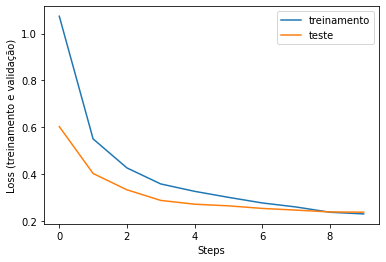

In [45]:
plt.figure()
plt.ylabel('Loss (treinamento e validação)')
plt.xlabel('Steps')
plt.plot(hist['loss'], label = 'treinamento')
plt.plot(hist['val_loss'], label = 'teste')
plt.legend();

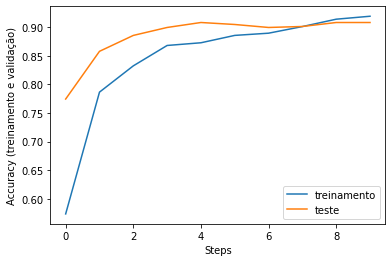

In [46]:
plt.figure()
plt.ylabel('Accuracy (treinamento e validação)')
plt.xlabel('Steps')
plt.plot(hist['accuracy'], label = 'treinamento')
plt.plot(hist['val_accuracy'], label = 'teste')
plt.legend();

# Testes com imagens

In [47]:
X, y = next(iter(base_teste))

In [48]:
X

<tf.Tensor: shape=(16, 512, 512, 3), dtype=float32, numpy=
array([[[[0.45098042, 0.47058827, 0.28627452],
         [0.45098042, 0.47058827, 0.28627452],
         [0.454902  , 0.4754902 , 0.2911765 ],
         ...,
         [0.53431374, 0.5171569 , 0.3921569 ],
         [0.53333336, 0.5176471 , 0.3921569 ],
         [0.53333336, 0.5176471 , 0.3921569 ]],

        [[0.45098042, 0.47058827, 0.28627452],
         [0.45098042, 0.47058827, 0.28627452],
         [0.454902  , 0.4754902 , 0.2911765 ],
         ...,
         [0.53431374, 0.5171569 , 0.3921569 ],
         [0.53333336, 0.5176471 , 0.3921569 ],
         [0.53333336, 0.5176471 , 0.3921569 ]],

        [[0.4519608 , 0.47156864, 0.2897059 ],
         [0.4519608 , 0.47156864, 0.2897059 ],
         [0.45502454, 0.47567403, 0.29368874],
         ...,
         [0.5418505 , 0.5241422 , 0.3998162 ],
         [0.5411765 , 0.52500004, 0.40000004],
         [0.5411765 , 0.52500004, 0.40000004]],

        ...,

        [[0.42156866, 0.4534314 ,

In [49]:
X.shape

TensorShape([16, 512, 512, 3])

In [50]:
y

<tf.Tensor: shape=(16, 8), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [51]:
y.shape

TensorShape([16, 8])

In [52]:
imagem = X[0, :, :, :]
imagem

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.45098042, 0.47058827, 0.28627452],
        [0.45098042, 0.47058827, 0.28627452],
        [0.454902  , 0.4754902 , 0.2911765 ],
        ...,
        [0.53431374, 0.5171569 , 0.3921569 ],
        [0.53333336, 0.5176471 , 0.3921569 ],
        [0.53333336, 0.5176471 , 0.3921569 ]],

       [[0.45098042, 0.47058827, 0.28627452],
        [0.45098042, 0.47058827, 0.28627452],
        [0.454902  , 0.4754902 , 0.2911765 ],
        ...,
        [0.53431374, 0.5171569 , 0.3921569 ],
        [0.53333336, 0.5176471 , 0.3921569 ],
        [0.53333336, 0.5176471 , 0.3921569 ]],

       [[0.4519608 , 0.47156864, 0.2897059 ],
        [0.4519608 , 0.47156864, 0.2897059 ],
        [0.45502454, 0.47567403, 0.29368874],
        ...,
        [0.5418505 , 0.5241422 , 0.3998162 ],
        [0.5411765 , 0.52500004, 0.40000004],
        [0.5411765 , 0.52500004, 0.40000004]],

       ...,

       [[0.42156866, 0.4534314 , 0.27990198],
        [0.42

In [53]:
y_true = np.argmax(y[0])
y_true

2

In [54]:
classes[y_true]

'25-30'

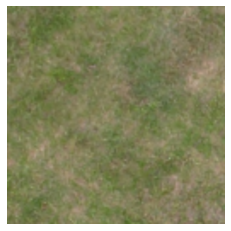

In [55]:
plt.imshow(imagem)
plt.axis('off');

In [56]:
imagem.shape

TensorShape([512, 512, 3])

In [57]:
imagem = np.expand_dims(imagem, axis = 0)
imagem.shape

(1, 512, 512, 3)

In [58]:
previsao = modelo.predict(imagem)
previsao

1/1 [==============================] - 6s 6s/step


array([[-1.4600668, -3.0094278,  3.946786 , -3.9251194, -0.7429716,
        -8.790031 , -3.014127 , -4.7592063]], dtype=float32)

In [59]:
previsao = np.argmax(previsao)
previsao

2

In [60]:
print('Classe correta: ', classes[y_true])
print('Previsão: ', classes[previsao])

Classe correta:  25-30
Previsão:  25-30


In [61]:
modelo.save('/content/model')


In [62]:
modelo_carregado = tf.keras.models.load_model('/content/model')


In [63]:
modelo_carregado.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 207,626,080
Trainable params: 10,248
Non-trainable params: 207,615,832
_________________________________________________________________


In [64]:
previsao = classes[np.argmax(modelo_carregado.predict(imagem))]
print('Classe correta: ', classes[y_true])
print('Previsão: ', previsao)

1/1 [==============================] - 5s 5s/step
Classe correta:  25-30
Previsão:  25-30
